### K-Mean Clustring

In [1]:
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("income.csv")

In [4]:
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income($)')

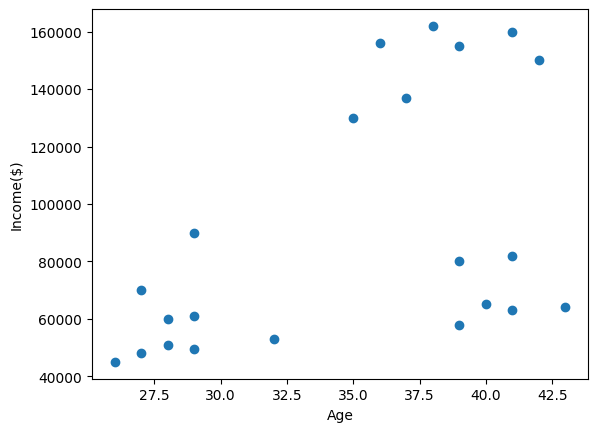

In [5]:
plt.scatter(data.Age,data["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [6]:
km = KMeans(n_clusters=3)

In [7]:
km

KMeans(n_clusters=3)

In [8]:
y_pre  = km.fit_predict(data[["Age","Income($)"]])

In [9]:
y_pre

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [10]:
data["Cluster"] = y_pre

In [11]:
data

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2
5,Gautam,39,155000,2
6,David,41,160000,2
7,Andrea,38,162000,2
8,Brad,36,156000,2
9,Angelina,35,130000,0


In [12]:
km.cluster_centers_

array([[3.60000000e+01, 1.33500000e+05],
       [3.32000000e+01, 6.26333333e+04],
       [3.92000000e+01, 1.56600000e+05]])

In [13]:
df1 = data[data.Cluster == 0]
df2 = data[data.Cluster == 1]
df3 = data[data.Cluster == 2]


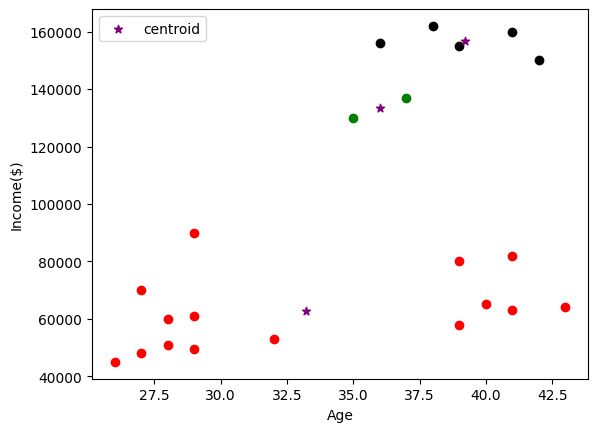

In [17]:
plt.scatter(df1.Age,df1["Income($)"],color = 'green')
plt.scatter(df2.Age,df2["Income($)"],color = 'red')
plt.scatter(df3.Age,df3["Income($)"],color = 'black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker = '*',label = "centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()
plt.show()

In [18]:
scaler = MinMaxScaler()


In [23]:
scaler.fit(data[["Income($)"]])
data["Income($)"] = scaler.transform(data[["Income($)"]])


scaler.fit(data[["Age"]])
data["Age"] = scaler.transform(data[["Age"]])

In [24]:
data


,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,0


In [25]:
df1 = data[data.Cluster == 0]
df2 = data[data.Cluster == 1]
df3 = data[data.Cluster == 2]


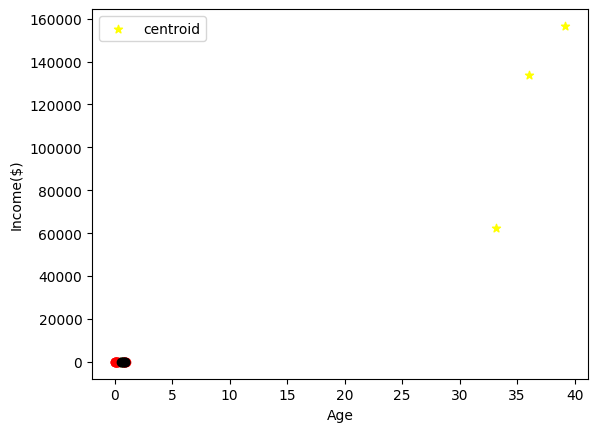

In [29]:
plt.scatter(df1.Age,df1["Income($)"],color = 'green')
plt.scatter(df2.Age,df2["Income($)"],color = 'red')
plt.scatter(df3.Age,df3["Income($)"],color = 'black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'yellow',marker = '*',label = "centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()
plt.show()

In [31]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age',"Income($)"]])
    sse.append(km.inertia_)

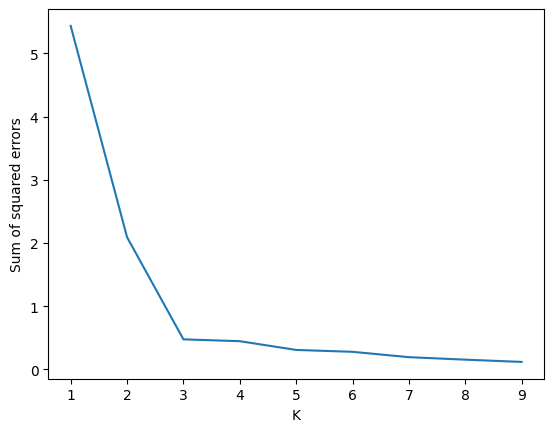

In [32]:
plt.xlabel("K")
plt.ylabel("Sum of squared errors")
plt.plot(k_rng,sse)